# Diabetes 30days Readmission Prediction


**Team Member:** **Yucheol-Shin**, **Ricco Ferraro**

## Business Understanding

Diabetes mellitus is a chronic disease which affect millions of people all over the world. The prevelance among the US population is above 10%, which is 1 in 10 Americans, and it is one of the primary cause of death.

Because of the nature of the disease, patient needs to go back to hospital frequently, mostly related to clinical complications of diabetes. Diabetes account for a large ratio of total hospitalized patients. In the 2017 audit, around 1 in 6 (18%) of all people in hospital had diabetes. Thirty-day hospital readmissions rate of a previously admitted patient can go as high as 20%.

Prediction of a patient's readmission possibility is essential in hospitalization management. Interventions to reduce hospitalization rate and maintain healthy status and life quality of patients are main targets. Early detection of readmission risks allow advanced preparation on patients, doctors and hospital side.

The goal of this study is to predict the thirty-day readmission risk of a patient using logistic regression, through the feature selection, we can identify the main factors result in frequent readmission. Predicting the negative case of non-readmittance is secondary goal of the study.


# Data understanding
### Ethical concern
Our dataset is a real world dataset from an unknown hospital. For ethical concerns and data leakage precautions, irrelevant patient information are not provided, patient names are anonymous, race will not be used in this model building. Patient ages are provided in age group. Patient gender will be used in our modelling because it is important factor for readmission prediction.This dataset can be used for research and education only.

### Data dictionary

We have the data dictionary found from below reference to understand the data descriptions.
reference: https://www.hindawi.com/journals/bmri/2014/781670/tab1/

In [7]:
#Packages loading
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import os
# import pandas_profiling

#show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#show output in one cell
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [176]:
#load data
curPath = os.getcwd().replace("\\", "/")
os.chdir(curPath+"/dataset_diabetes")
df = pd.read_csv('diabetic_data.csv')
df.shape

(101766, 50)

We have a total of 101766 observations, with 50 features including the readmission

In [284]:
# #Load data dictionary
# DataDictionary = pd.read_excel('DataDictionary.xlsx', index_col=0)
# IDmapping = pd.read_csv('IDs_mapping.csv')
# #display full text of a pandas dataframe
# pd.set_option("display.max_colwidth", -1)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# #display dictionary
# DataDictionary
# IDmapping


In [6]:
df.describe(include='object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [8]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### Dependent Variable Conversion
Target 'readmitted' has three unique values, <30, >30 and No. As our target is to estimate the less than 30 day readmission risk, we will classify >30 days readmission as NO, which is the negative case and Yes as postiive case.

In [181]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [182]:
df['readmitted'] = np.where(df['readmitted'] == '<30', 1, 0)

### Test-Train split
Below you can see that we hold out a test set of 30% of our data. This will be used later for model evaulation. 

In [314]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [315]:
train.shape , test.shape

((81412, 50), (20354, 50))

# Data Evaluation


### EDA

In [316]:
# # # pandas profiling for EDA analysis
# # import pandas_profiling as pp
# # EDAReport = pp.ProfileReport(df_2)
# # EDAReport

# # As we can see from the ID_mapping table, below columns need to be object instead of numeric during model fitting
# # - admission_type_id
# # - discharge_disposition_id
# # - and admission_source_id

# #change data types
# df_2 = df_2.astype({"discharge_disposition_id":'category', "num_procedures":'int64', "number_inpatient":'int64',
#                 "number_diagnoses":'int64'})

##### Visual Analysis

As can be seen below, the percentage of patients who were readmitted is much lower than those who were not readmitted.This lead to imbalance in our dataset. In order to prioritize predictive power of positive readmittance rate, we will address this class imbalance below.

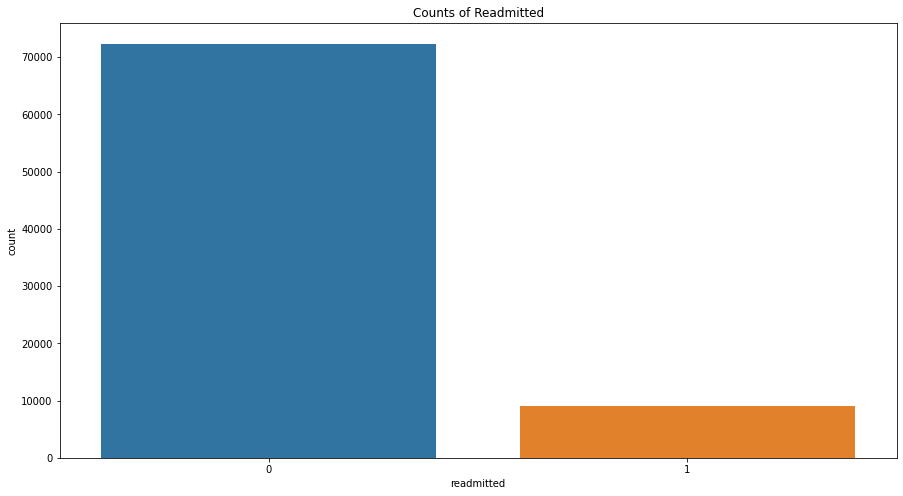

In [317]:
plt.figure(figsize=(15,8));
sns.countplot(x='readmitted', data=train);
plt.title("Counts of Readmitted");

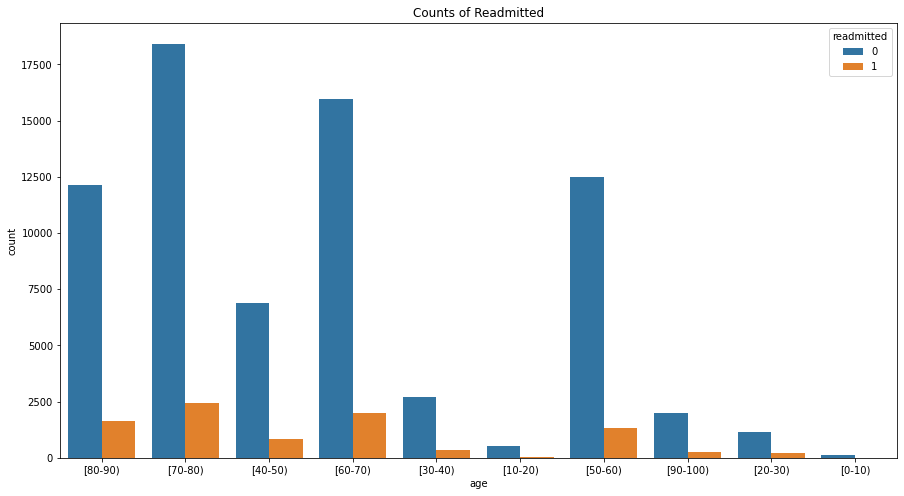

In [318]:
plt.figure(figsize=(15,8));
sns.countplot(x='age', hue='readmitted', data=train);
plt.title("Counts of Readmitted");

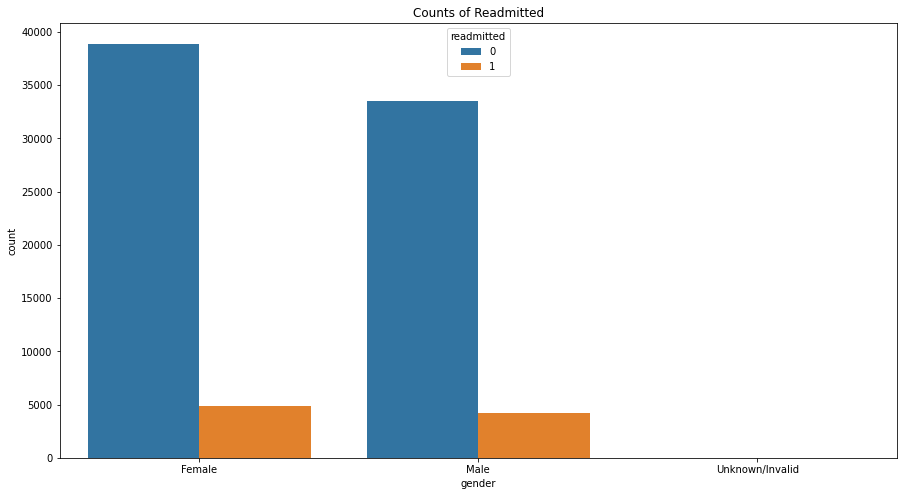

In [319]:
plt.figure(figsize=(15,8));
sns.countplot(x='gender', hue='readmitted', data=train);
plt.title("Counts of Readmitted");

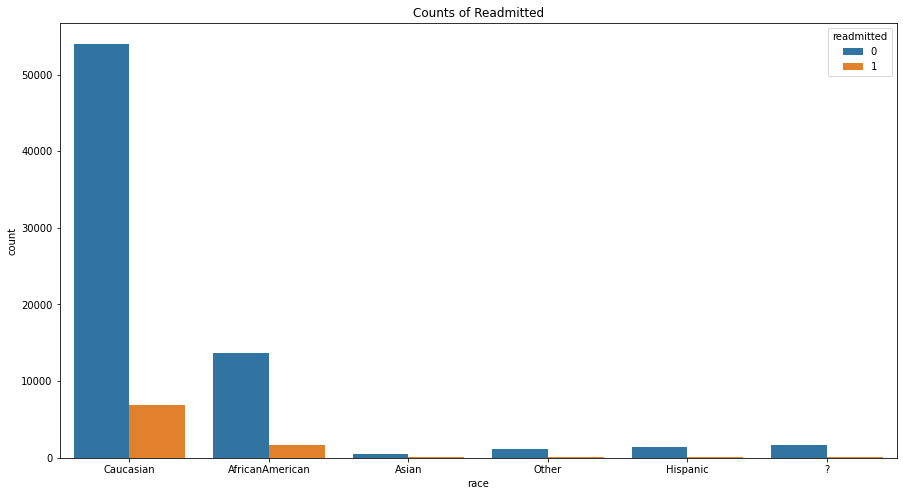

In [320]:
plt.figure(figsize=(15,8));
sns.countplot(x='race', hue='readmitted', data=train);
plt.title("Counts of Readmitted");

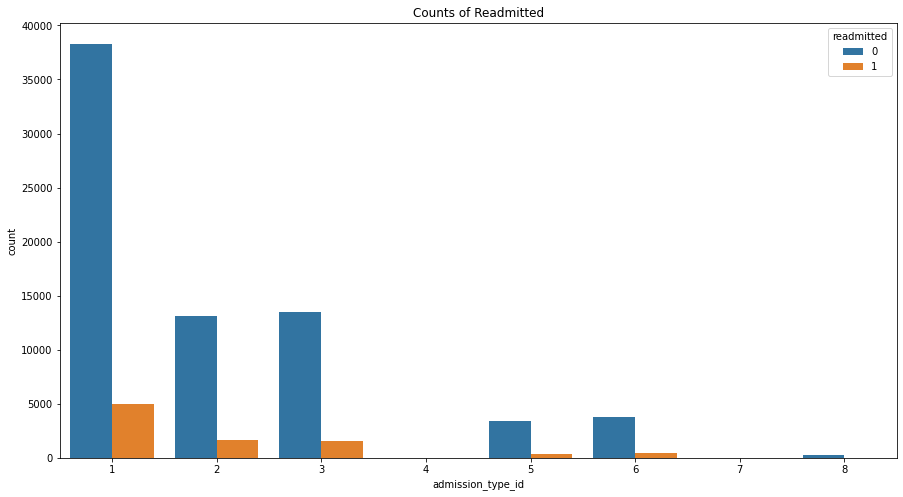

In [321]:
plt.figure(figsize=(15,8));
sns.countplot(x='admission_type_id', hue='readmitted', data=train);
plt.title("Counts of Readmitted");

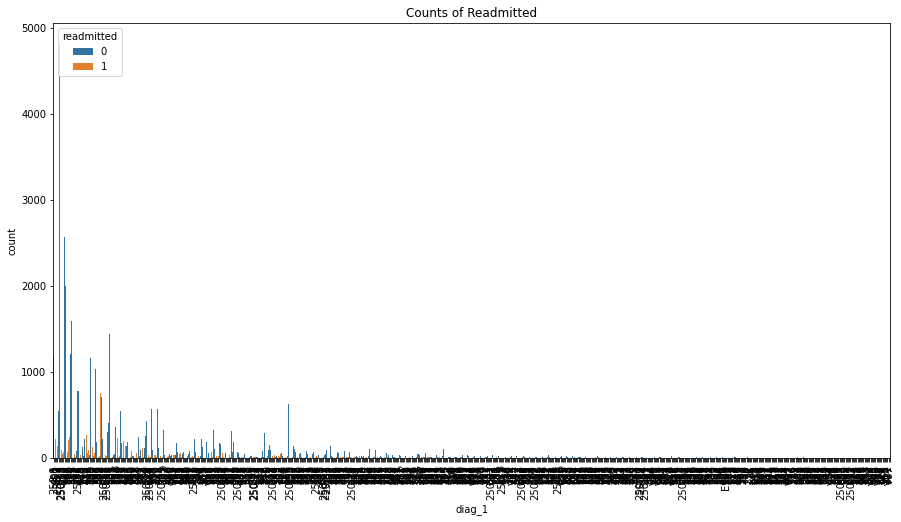

In [322]:
plt.figure(figsize=(15,8));
sns.countplot(x='diag_1', hue='readmitted', data=train);
plt.xticks(rotation=90);
plt.title("Counts of Readmitted");

### Diagnosis Analysis

We have diagnosis data, dia_1, diag_2, and diag_3. They are formed with ICD-9 codes as reference below that each number represent the corresponding diagnosis. Diagnosis datas have large number of categorical levels that they have more than 800 distinct levels. In order to understand the data in detail, we converted the data with below groups of ICD-9 codes.

Reference: https://en.wikipedia.org/wiki/List_of_ICD-9_codes

- List of ICD-9 codes 001–139: infectious and parasitic diseases
- List of ICD-9 codes 140–239: neoplasms
- List of ICD-9 codes 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- List of ICD-9 codes 280–289: diseases of the blood and blood-forming organs
- List of ICD-9 codes 290–319: mental disorders
- List of ICD-9 codes 320–389: diseases of the nervous system and sense organs
- List of ICD-9 codes 390–459: diseases of the circulatory system
- List of ICD-9 codes 460–519: diseases of the respiratory system
- List of ICD-9 codes 520–579: diseases of the digestive system
- List of ICD-9 codes 580–629: diseases of the genitourinary system
- List of ICD-9 codes 630–679: complications of pregnancy, childbirth, and the puerperium
- List of ICD-9 codes 680–709: diseases of the skin and subcutaneous tissue
- List of ICD-9 codes 710–739: diseases of the musculoskeletal system and connective tissue
- List of ICD-9 codes 740–759: congenital anomalies
- List of ICD-9 codes 760–779: certain conditions originating in the perinatal period
- List of ICD-9 codes 780–799: symptoms, signs, and ill-defined conditions
- List of ICD-9 codes 800–999: injury and poisoning
- List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

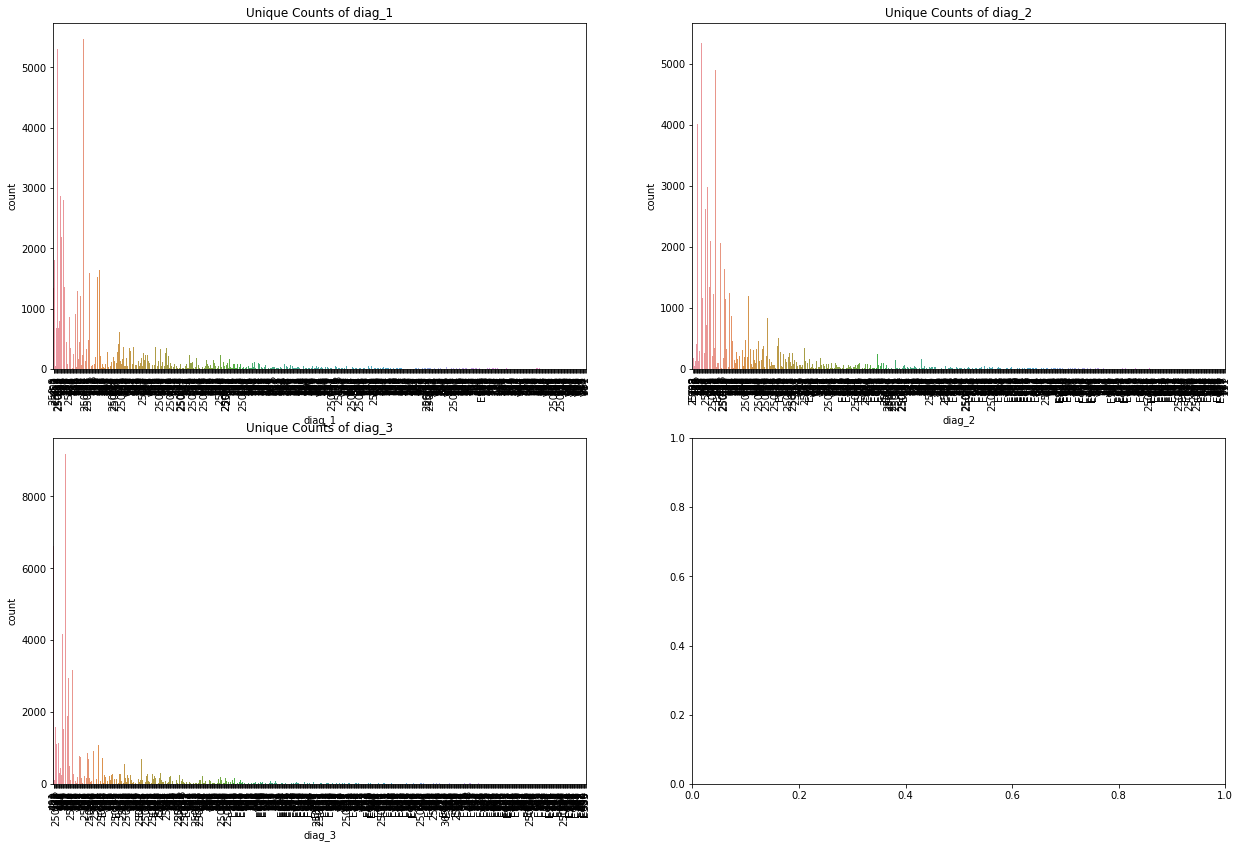

In [324]:
### TODO ###
### Remove the lables on the axes for the better visualization ###

fig, axes = plt.subplots(2,2, figsize=(21, 14));

sns.countplot(data=train, x='diag_1', ax=axes[0,0]);
axes[0,0].set_title("Unique Counts of diag_1");
axes[0,0].set_xticklabels(train['diag_1'].unique(), rotation=90);

sns.countplot(data=train, x='diag_2', ax=axes[0,1]);
axes[0,1].set_title("Unique Counts of diag_2");
axes[0,1].set_xticklabels(train['diag_2'].unique(), rotation=90);

sns.countplot(data=train, x='diag_3', ax=axes[1,0]);
axes[1,0].set_title("Unique Counts of diag_3");
axes[1,0].set_xticklabels(train['diag_3'].unique(), rotation=90);


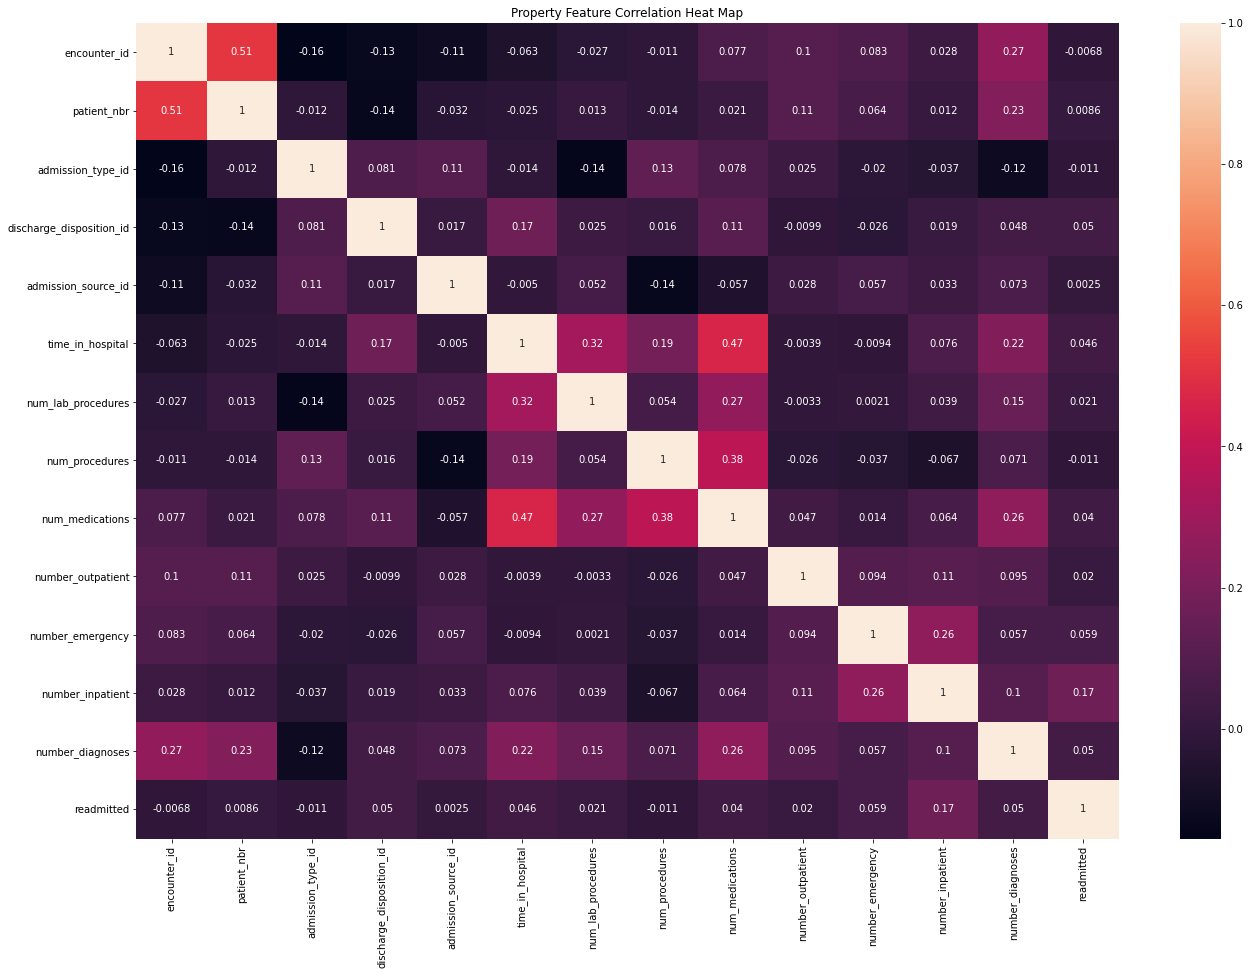

In [325]:
corr_properties_matrix = train.corr()

fig, ax = plt.subplots(figsize=(22,15));
sns.heatmap(corr_properties_matrix, annot=True);
plt.title("Property Feature Correlation Heat Map");

In [326]:
for x in df.columns:
        if(df[x].nunique() > 50):
            print("{0} has large number of nominal data with {1} different values".format(x, df[x].nunique()))
        else:
            print("{0} has belew unique values".format(x))
            print("\t{0}".format(df[x].unique()))

encounter_id has large number of nominal data with 101766 different values
patient_nbr has large number of nominal data with 71518 different values
race has belew unique values
	['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender has belew unique values
	['Female' 'Male' 'Unknown/Invalid']
age has belew unique values
	['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight has belew unique values
	['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id has belew unique values
	[6 1 2 3 4 5 8 7]
discharge_disposition_id has belew unique values
	[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id has belew unique values
	[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital has belew unique values
	[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code has belew unique values
	['?' 'MC' 'MD

In [327]:
# for x in train.columns:
#         if(train[x].nunique() > 50):
#             print("{0} has large number of nominal data with {1} different values".format(x, train[x].nunique()))
#         else:
#             print("{0} has belew unique values".format(x))
#             print("\t{0}".format(train[x].unique()))

### Missing data

Simply by looking at the dataset, we found lots of missing values marked as '?' in the csv file. We need to have a summary of missing values in each columns. Beside,data type of each column is evaluated before EDA analysis.

We will analyze these columsn with missing values by checking the correlation with the readmittance rate and apply imputation techinques to handle the missing data. 

In [328]:
from IPython.display import display
#replace th "?" value with NaN
#check missing values of each columns 
train_miss = train.replace('?',np.NaN, inplace=False)
display(train.replace('?',np.NaN, inplace=False).isna().sum())
# display(train.replace('?',np.NaN, inplace=False).dtypes)

encounter_id                    0
patient_nbr                     0
race                         1809
gender                          0
age                             0
weight                      78853
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  32254
medical_specialty           39988
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         14
diag_2                        287
diag_3                       1132
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [329]:
col_miss = train_miss.columns[train_miss.isnull().any()]
col_miss

Index(['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3'],
      dtype='object')

##### Evaluate Missing Data

Before we impute the missing data, we first need to understand the correlation of the columns with missing data with the target data, which is readmitted.


As can be seen in the below missing value distribution plot, `weight`has over 90% missing data. Therefore we decide not to impute this data. Additionally, due to the controversial nature of including race in the model, we choose to omit `race`. Next, `diagnosis 1, 2, and 3` proportionally have very few missing values. We choose to leave `missing` as a category of each column to avoid controversy in imputation where unecessary. It is posible that a "misssing" value for one of these diagnosis is indeed its own valid level possibly representing a physician's inability to diagnose a patient. 


Further analysis on `Payer Code` and `Medical Specialty` will be performed below to determine the best stragety to include them in our model.

<Figure size 720x432 with 0 Axes>

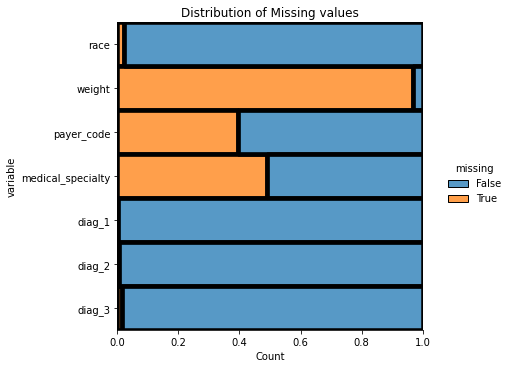

In [330]:
plt.figure(figsize=(10,6));
sns.displot(
    data=train_miss[col_miss].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);
plt.title("Distribution of Missing values");

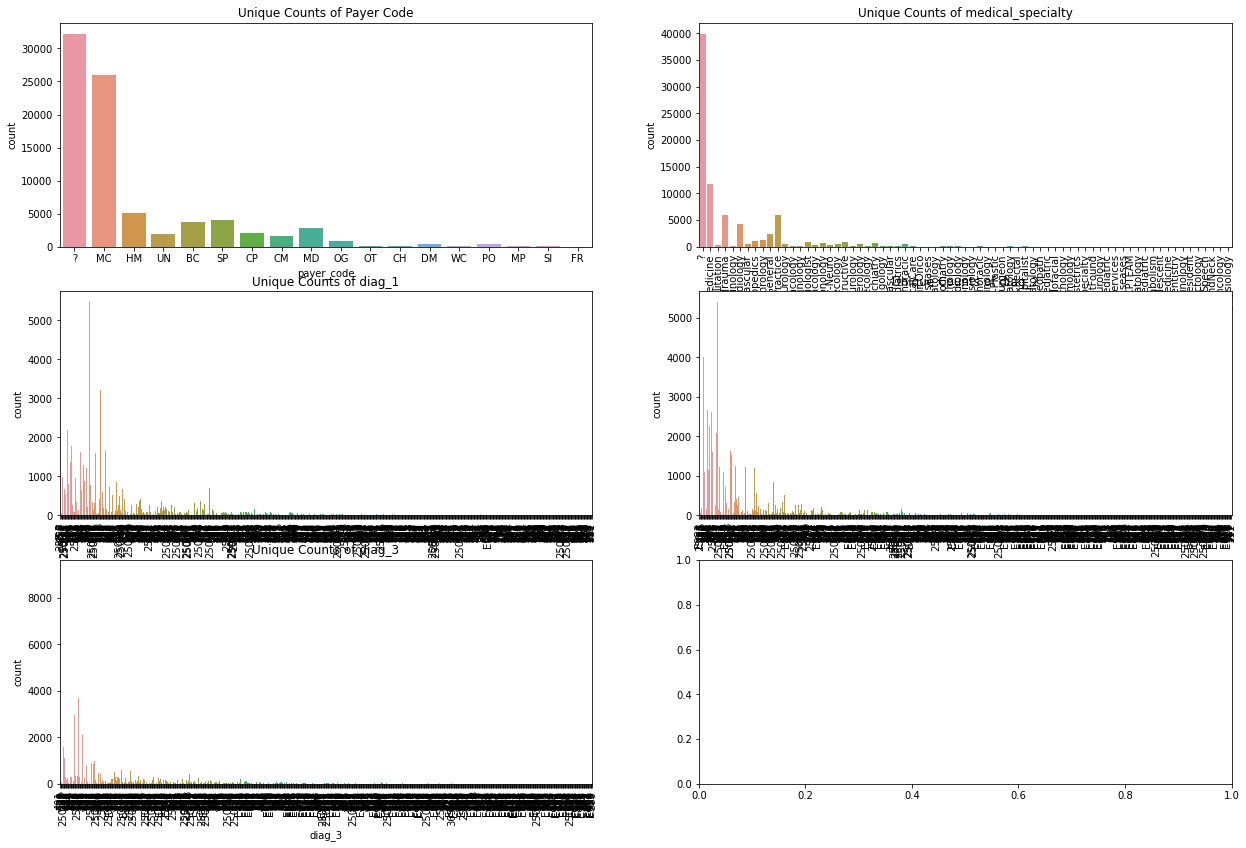

In [331]:
### TODO ###
### Remove the lables on the axes for the better visualization ###

fig, axes = plt.subplots(3,2, figsize=(21, 14));

sns.countplot(data=train, x='payer_code', ax=axes[0,0]);
axes[0,0].set_title("Unique Counts of Payer Code");

sns.countplot(data=train, x='medical_specialty', ax=axes[0,1]);
axes[0,1].set_title("Unique Counts of medical_specialty");
axes[0,1].set_xticklabels(train['medical_specialty'].unique(), rotation=90);

sns.countplot(data=train, x='diag_1', ax=axes[1,0]);
axes[1,0].set_title("Unique Counts of diag_1");
axes[1,0].set_xticklabels(train['diag_1'].unique(), rotation=90);

sns.countplot(data=train, x='diag_2', ax=axes[1,1]);
axes[1,1].set_title("Unique Counts of diag_2");
axes[1,1].set_xticklabels(train['diag_2'].unique(), rotation=90);

sns.countplot(data=train, x='diag_3', ax=axes[2,0]);
axes[2,0].set_title("Unique Counts of diag_3");
axes[2,0].set_xticklabels(train['diag_3'].unique(), rotation=90);


In [332]:
### TODO ###
### Maybe we can add plot of number of unique values ###

### Payer Code Analysis

As can be seen below, we have a highly unbalanced distrubtion of payer code levels. When visualizing the percentage of readmitted by payer code levels, we can see that most of payer codes are associated with very simlar percentage of readmittance. In fact, only two levels (FR, WC) are correlated with a noticable difference in readmittance from the other levels. However, those levels are rare payer code. Therefore, we decide the payer code should not be included in our final model.

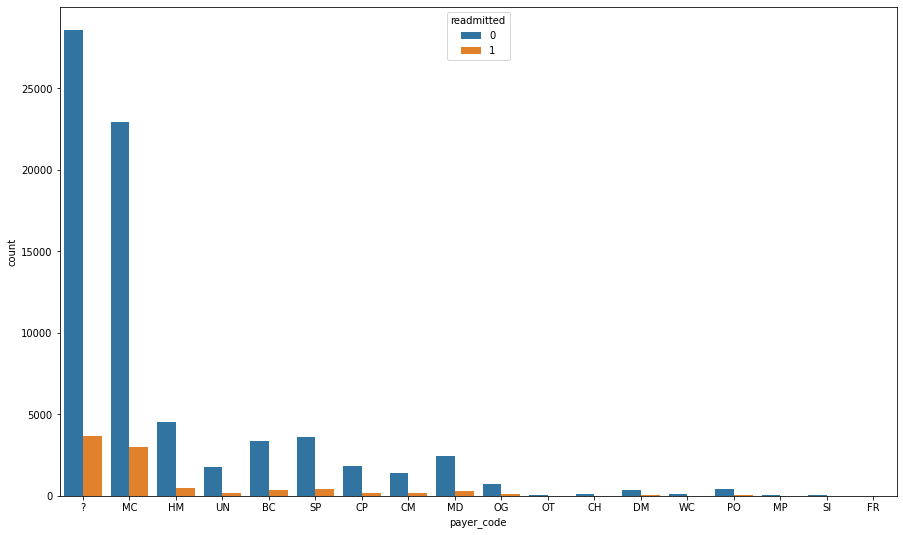

In [333]:
plt.figure(figsize=(15,9));
sns.countplot(data=train, x='payer_code', hue='readmitted');

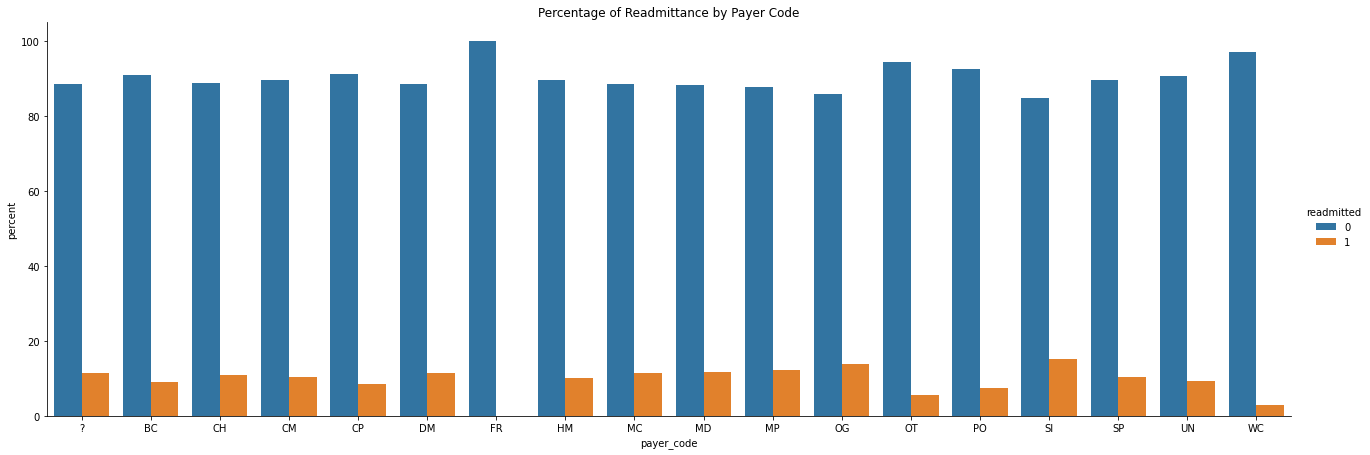

In [334]:
(train
.groupby('payer_code')['readmitted']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='payer_code',y='percent',hue='readmitted', kind='bar', height=6, aspect=3));
plt.title("Percentage of Readmittance by Payer Code");

### Medical Specialty Analysis

As can be seen below, we have a highly unbalanced distrubtion of medical specialty levels. Also when visualizing the percentage of readmitted by medical specialty levels, we see that percentages vary and we can tell that there are differences in relationship between medical specialty levels and readmittance. We can see that few medical specialties are more common, for example `InternalMedicine , Family/GeneralPractice , Emergency/Trauma , Cardiology`. We may require further analysis to understand the relationship after we aggregate the data. We also identified that `medical specialty` looks like missing completely at random that we are not able to identify significant patterns when it is missing.


One thing to note, class imbalance on readmittance affects the ratio of percentages of readmittance by medical specialties. To account for this imbalance, we plot only the positive case of readmittance.

In [335]:
train_miss[train_miss['medical_specialty'].isna()].describe(include='object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,39027,39988,39988,1250,26879,0,39983,39908,39646,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988,39988
unique,5,3,10,9,17,0,620,630,674,4,4,4,4,4,3,4,2,4,4,2,4,4,3,4,1,3,1,1,4,3,2,2,2,1,2,2
top,Caucasian,Female,[70-80),[75-100),MC,NaN,428,428,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,31032,21337,10393,511,14405,NaN,2818,2784,4132,38061,33559,32086,39623,39766,39956,38316,39987,35290,35520,39976,36976,37717,39859,39980,39988,39969,39988,39988,18945,39719,39977,39987,39987,39988,21616,30422


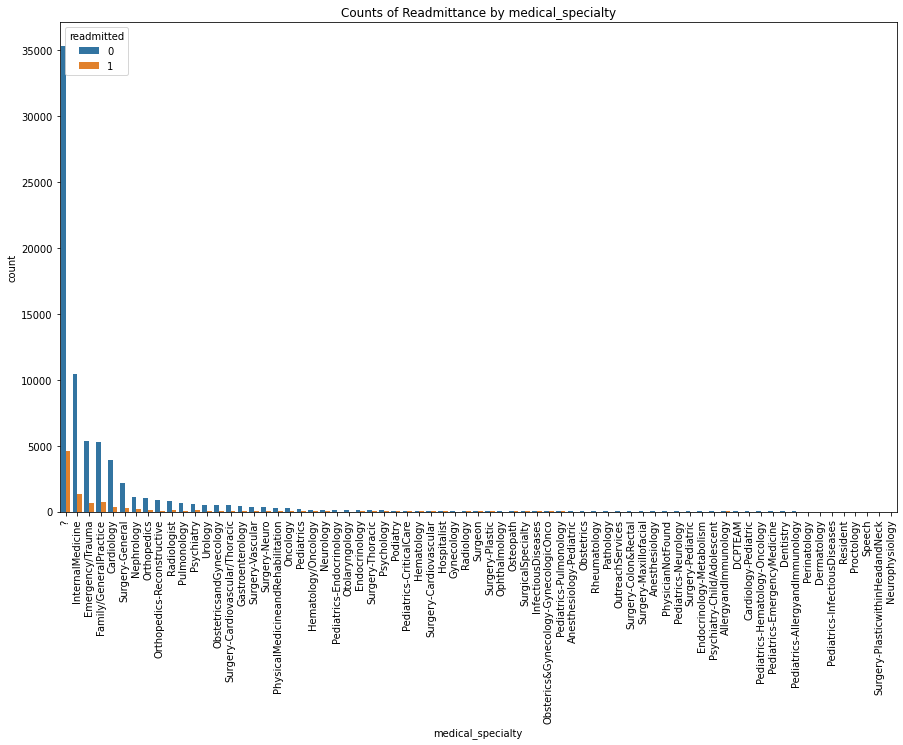

In [336]:
plt.figure(figsize=(15,9));
sns.countplot(data=train, x='medical_specialty', hue='readmitted', order = train['medical_specialty'].value_counts().index);
plt.xticks(rotation=90);
plt.title("Counts of Readmittance by medical_specialty");
# plt.show()

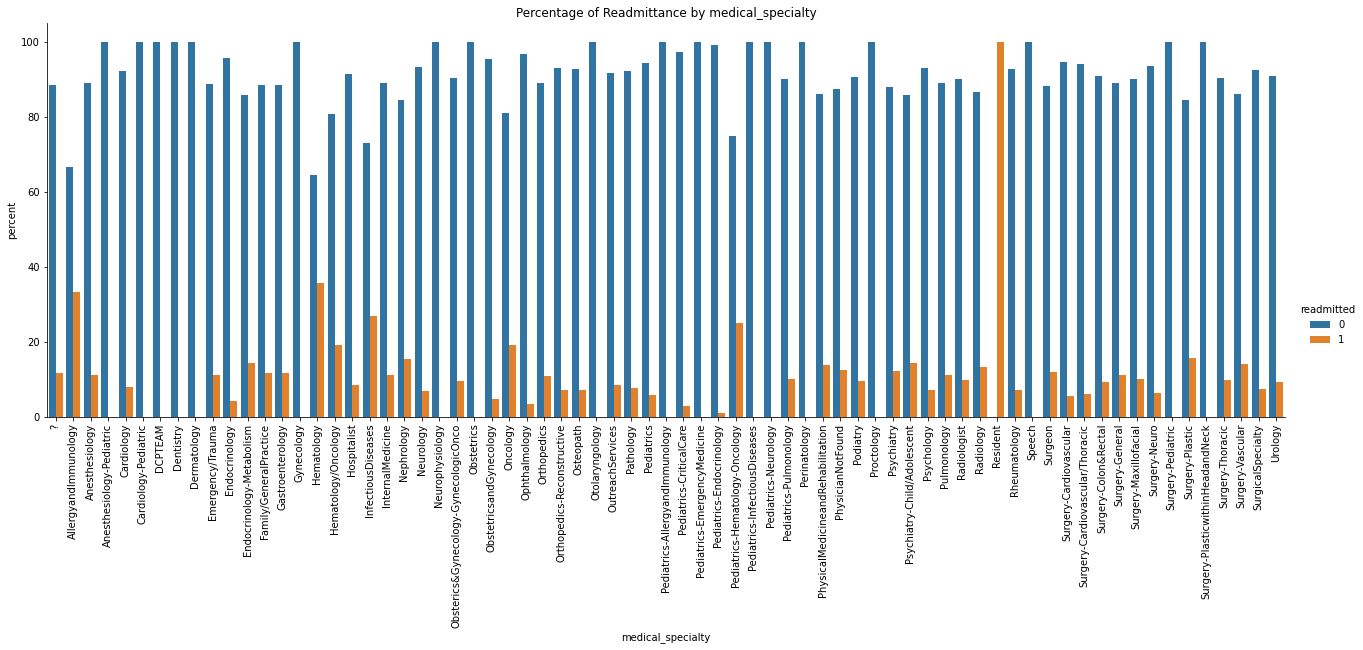

In [337]:
(train
.groupby('medical_specialty')['readmitted']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='medical_specialty',y='percent',hue='readmitted', kind='bar', height=6, aspect=3));
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by medical_specialty");

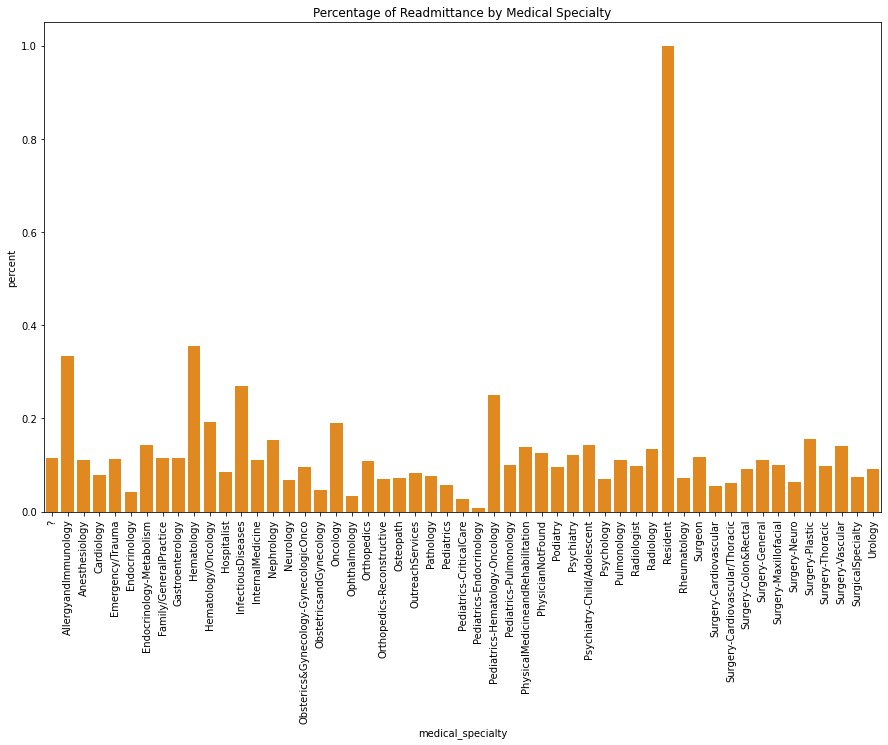

In [338]:
train_ms = train.groupby('medical_specialty')['readmitted'].value_counts(normalize=True).rename('percent').reset_index()
train_ms = train_ms[train_ms['readmitted'] == 1]

plt.figure(figsize=(15,9));
sns.barplot(data=train_ms, x='medical_specialty',y='percent', color='darkorange');
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by Medical Specialty");

##### Medical Specialty Analysis after Transformation

After we aggregate the medical specialties that have less counts into one variable called `Others`, we run another analysis to understand the relationship between medical specialties and readmittance. As can be seen below, the percentage of readmittance by medical specialties have different values. Thus, we believe that medical specialty is relevant and as such we need to address the missing data present for the medical specialty. Our techinque to imputing the data is covered below.

In [339]:
train_aggregate = train.copy()
col_ms_keep = train_aggregate['medical_specialty'].value_counts().index[0:10]
train_aggregate.loc[~train_aggregate['medical_specialty'].isin(col_ms_keep), 'medical_specialty'] = 'Others'

In [340]:
train_aggregate['medical_specialty'].unique()

array(['?', 'InternalMedicine', 'Others', 'Emergency/Trauma',
       'Cardiology', 'Orthopedics', 'Nephrology', 'Surgery-General',
       'Family/GeneralPractice', 'Radiologist',
       'Orthopedics-Reconstructive'], dtype=object)

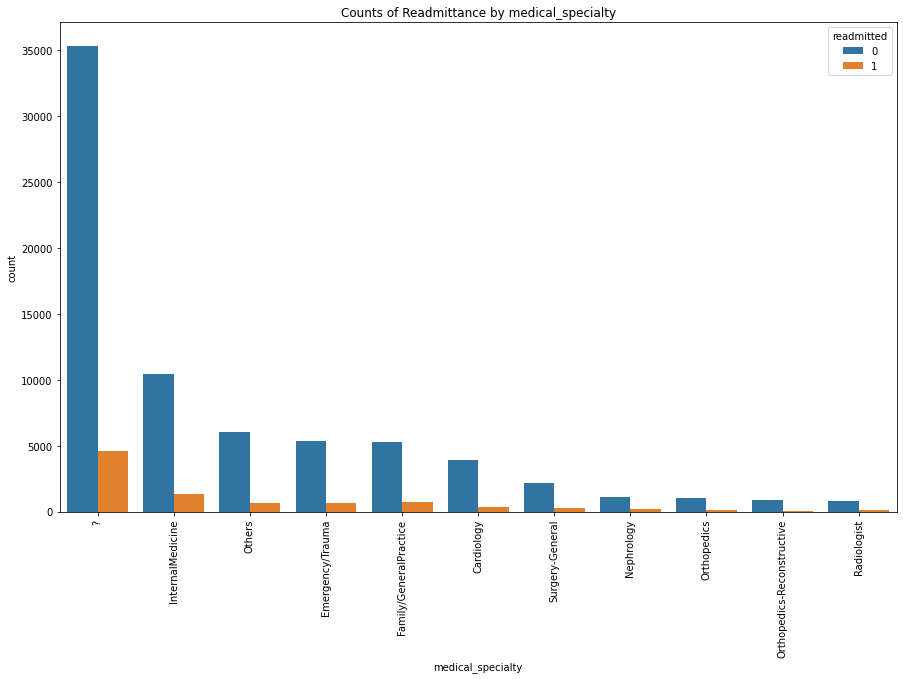

In [341]:
plt.figure(figsize=(15,9));
sns.countplot(data=train_aggregate, x='medical_specialty', hue='readmitted', order=train_aggregate['medical_specialty'].value_counts().index);
plt.xticks(rotation=90);
plt.title("Counts of Readmittance by medical_specialty");

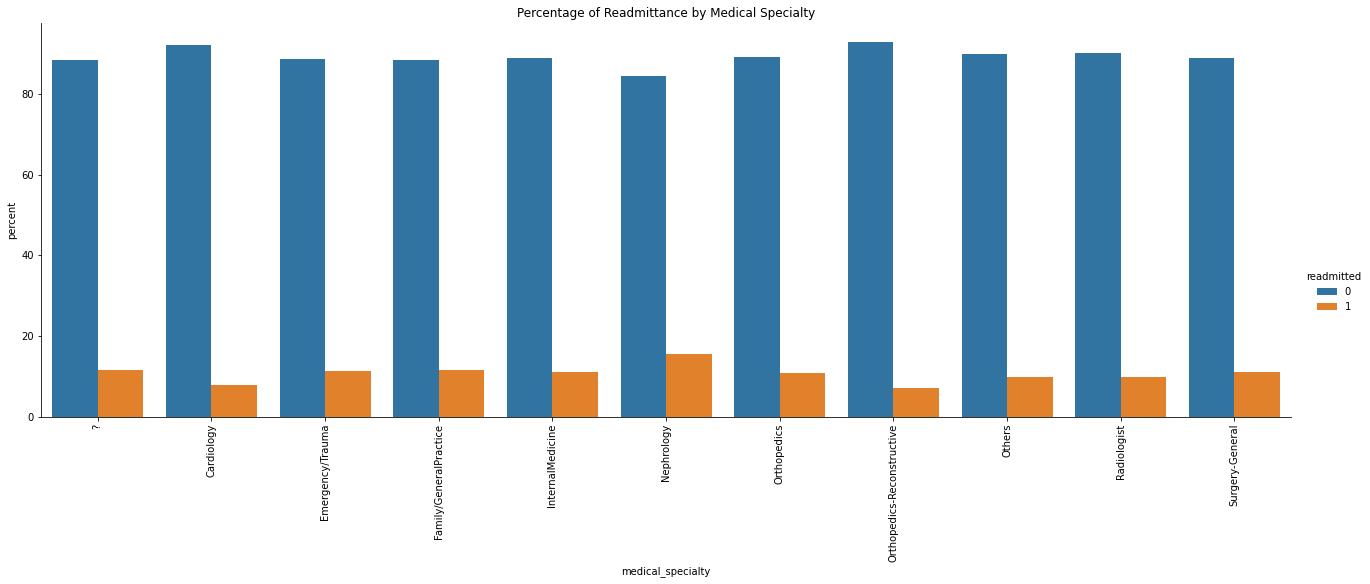

In [342]:
(train_aggregate
.groupby('medical_specialty')['readmitted']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='medical_specialty',y='percent',hue='readmitted', kind='bar', height=6, aspect=3));
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by Medical Specialty");

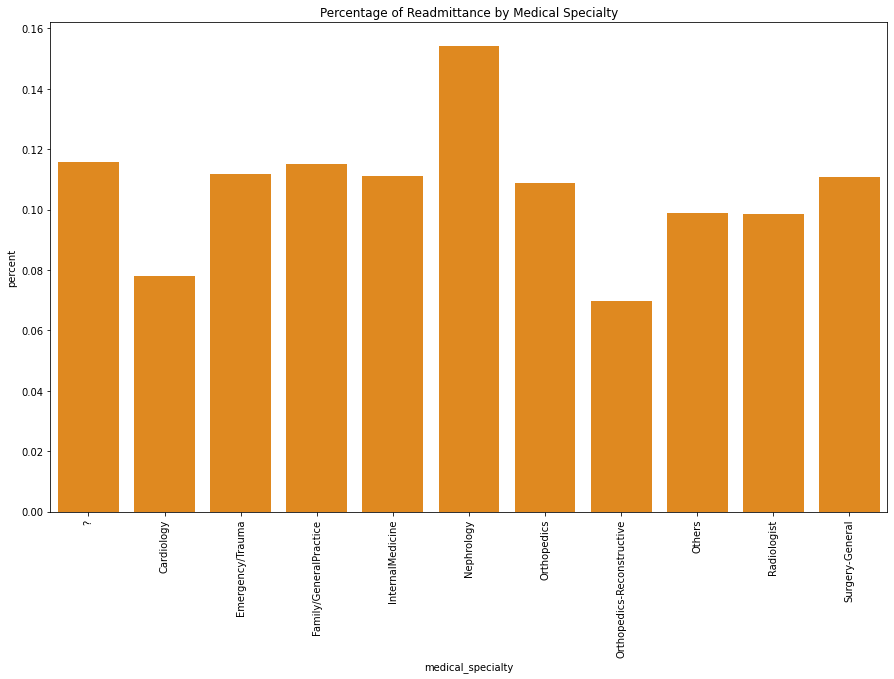

In [343]:
train_aggregate = train_aggregate.groupby('medical_specialty')['readmitted'].value_counts(normalize=True).rename('percent').reset_index()
train_aggregate = train_aggregate[train_aggregate['readmitted'] == 1]

plt.figure(figsize=(15,9));
sns.barplot(data=train_aggregate, x='medical_specialty',y='percent', color='darkorange');
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by Medical Specialty");

##### Missing value of Race Analysis

As can be seen below, the distribution of readmittance percentage across the race is somewhat flat without any visual evidences of significant differences. That, coupled with the fact that race is controversial leads us to omit the race feature from our model.

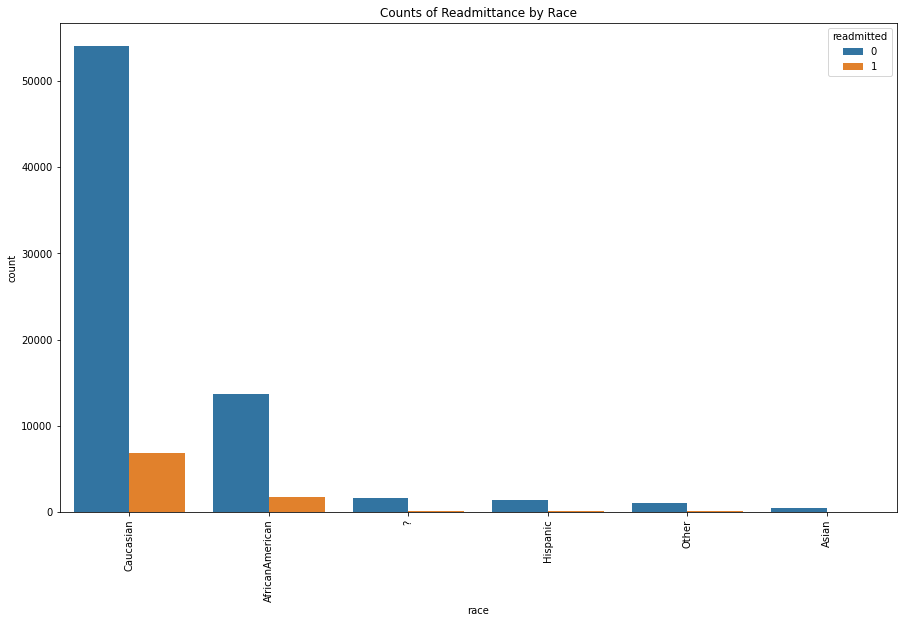

In [344]:
plt.figure(figsize=(15,9));
sns.countplot(data=train, x='race', hue='readmitted', order=train['race'].value_counts().index);
plt.xticks(rotation=90);
plt.title("Counts of Readmittance by Race");

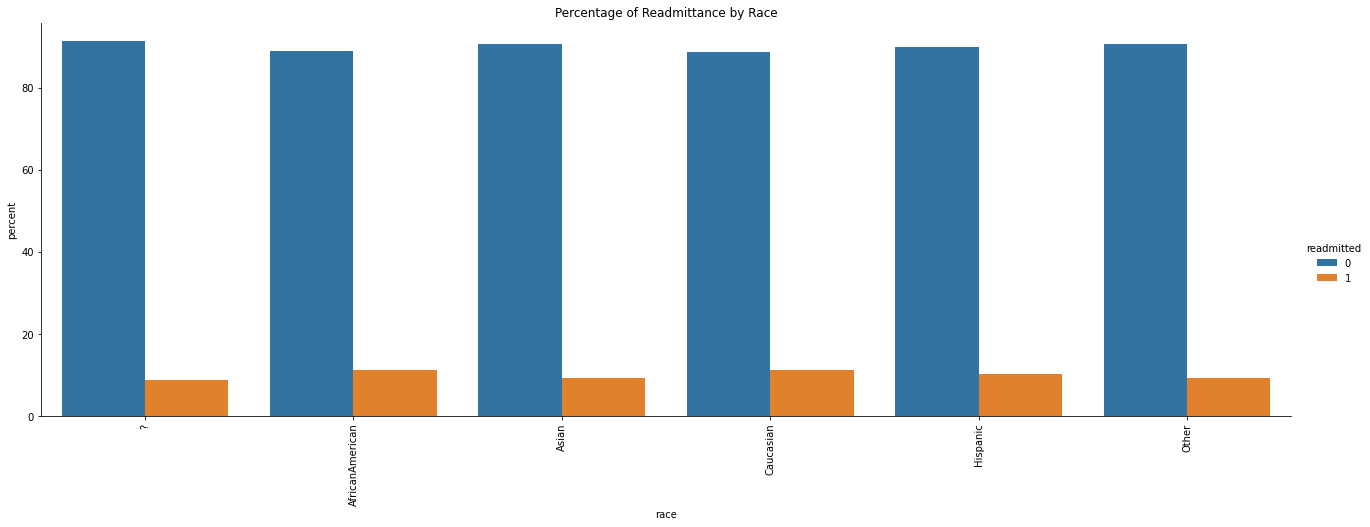

In [345]:
(train
.groupby('race')['readmitted']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='race',y='percent',hue='readmitted', kind='bar', height=6, aspect=3));
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by Race");

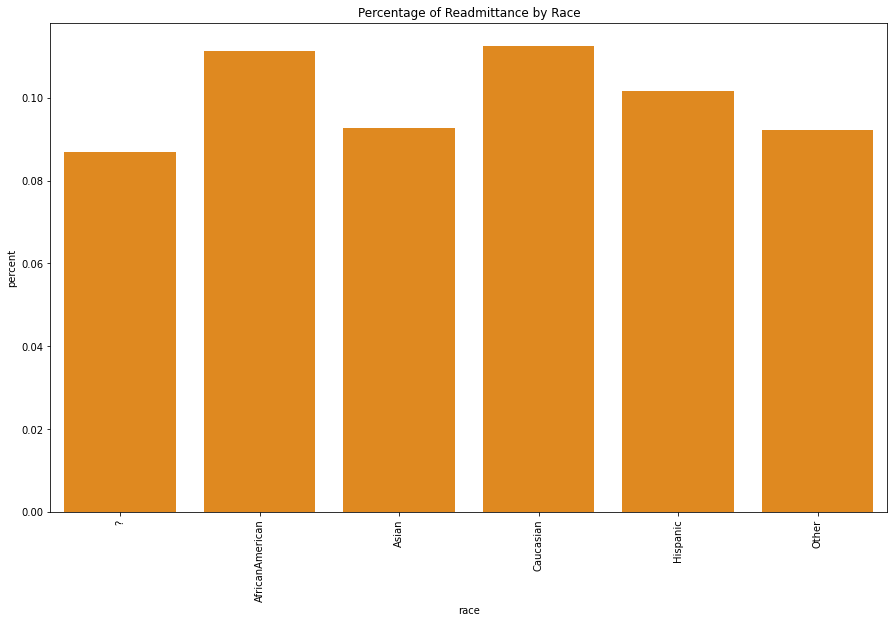

In [346]:
train_ms = train.groupby('race')['readmitted'].value_counts(normalize=True).rename('percent').reset_index()
train_ms = train_ms[train_ms['readmitted'] == 1]

plt.figure(figsize=(15,9));
sns.barplot(data=train_ms, x='race',y='percent', color='darkorange');
plt.xticks(rotation=90);
plt.title("Percentage of Readmittance by Race");

### Summary of EDA

Below is our summary of the EDA and we will make build and evalute our model based on our analysis.

1. Dropping unique ids columns
    - From the EDA we found `Encounter ID` and `patient_nbr` are unique ids that are associate with the patients. Since they are unique ids, we decide to drop these from the model
2. Drop controversial data
    - From our analysis, we do not found significant importance on the `race` and including race as a feature might be unethical be controversial
3. Drop columns has high percentages of missing values
    - When we count the number of missing values on our dataset, we found 90% of data are missing in `weight` and around 50% on `payer_code`. From the EDA, we also find that `payer_code` has percentage of readmittance rate that equally distributed among the levels of `payer_code`. Due to that reason, we decided to drop weight and `payer_code`
4. Aggregation of Diagnosis
    - `Diag_, diag_2, diag_3` have more than 800 distinct levels of categorical data. Since these are diagnosis that have been taken to the patients, it may have the impacts. In order to understand that, we have aggregate them into groups of categorical data.
5. Imputation for medical_specialty
    - We decide to impute the `medical_specialty` even though it has large number of missing data because it has some correlation with readmitted and see some distribution of readmittance rate for each levels of `medical_specialty`



## Modelling Preparation
### Model used
Logistic regression method is used to predict the 30-day readmission. Logistic regression is a classification algorithm, used when the value of the target variable is categorical. It is most commonly used when the data in question has binary output.
### Model evaluation method
ROC curves in logistic regression(binary classification) are used along with 5-fold crossvalidation to fit individual linear model to log-odds of Readmission with least squares. Subsequently, Folds were then scored ROC Area under the curve to select our "best model". This ROC scoring was used to select a model which handles imbalance the best and does not simply naively predict the negative case of "not-readmitted" due to model imbalance. Models that have good ROC area under the curve generally lend themselves to custom thresholding on the predicted probability a logistic regression model outputs.  

Once the best threshold has been picked to predict the positive case of "Readmitted(1)", which is the goal of our analysis, it is used to determine test precision and recall using our holdout "test" dataset. 

## Modelling Buidling and Evaluation 
### Missing Values - Imputation 
Below you can see that we use a Random Forest Variable importance technique combined with a Random Forest Classifier to predict missing values for `medical specialty`. 

### Imputation - Medical Specialty: 

Below, we impute medical specialty from the top 100 features that Random Forest Classification variable importance selected. The model we used to impute is Random Forest Classifier, and `accuracy` was used for our evaluation metrics. Furthur Grid Search with cross validation is used to optimize this model. Cross validation based prediction accuracy for imputed `medical specialty` was roughly *22%* with scaled data. 

We use preliminary random forest feature selection to avoid rare columns in medical specialty imputation. 

### Imputation - Diagnosis 1, Diagnosis 2, & Diagnosis 3: 

These were not imputed, as described previously. Proportionally these have very few missing values. We choose to leave `missing` as a category of each column to avoid controversy in imputation where unecessary. It is posible that a "misssing" value for one of these diagnosis is indeed its own valid level possibly representing a physician's inability to diagnose a patient. Further, rare columns like missing values of Diagnosis 1,2 and 3, are not included in feature selection due to the fact that again, they are rare occurences. 

### Sampling Methedology: 

A Random 80%-20% test - train split was used to holdout 20% of the data to be evaluated. We know from EDA that we have a highly unbalanced dataset. However, central limit theorom, given the fact that we have a large dataset, shoulld mean that our test and train splits both have roughly the same distribution of Radmitted and Not Readmitted as the full dataset. We choose not to perform stratified sampling, because test data will likely have the same unbalanced nature, and we don't want a model which is trained on data which has been articically balanced. To correct for our imbalance, we will instead carefully choose an appropriate threshold instead. 


### Parameter Tunning:
We utilized the parameter tuning for the log regression model by using Grid Search with cross validation of 5 folds. Several parameters are provided in the grid in order to find the best estimators for the model. We used penalty and C parameters to control the regularization.

### Model Performance:
We used ROC to score our performance of the log regression model, and we have around `0.67` for performance. In order to predict the model better, we used precision-recall to compare different thresholds. When we have `0.15` as our threshold we are able to optimal precision with `0.2246056782334385` and recall with `.3072939145446698`. Due to the imbalance data on our dependent variable, `readmitted`, the precision and recall are tend to be low.


####  Aggretation of Diagnosis 

In [323]:
def convert_diag(data, col_list):
    
    diag_map = {0: 'infectious_and_parasitic', 1: 'neoplasms', 2: 'immunity_disorders', 
               3: 'blood_organs', 4: 'mental', 5: 'nervous_sense_organs',
               6: 'circulatory_system', 7: 'respiratory_system', 8: 'digestive_system',
               9: 'genitourinary_system', 10: 'pregnancy_and_puerperium',11: 'skin_and_subcutaneous',
               12: 'musculoskeletal_system', 13: 'congenital_anomalies', 14: 'perinatal_period',
               15: 'ill_conditions', 16: 'injury', 17: '?'}
#     diag_map = {'infectious_and_parasitic': 0, 'neoplasms': 1, 'immunity_disorders': 2, 
#                'blood_organs': 3,'mental': 4,'nervous_sense_organs': 5,
#                'circulatory_system': 6,'respiratory_system': 7,'digestive_system': 8,
#                'genitourinary_system': 9,'pregnancy_and_puerperium': 10,'skin_and_subcutaneous': 11,
#                'musculoskeletal_system': 12,'congenital_anomalies': 13,'perinatal_period': 14,
#                'ill_conditions': 15,'injury': 16}
    
    for x in col_list:
        # conver E and V codes into -1
        data.loc[data[data[x].str.contains('V') | data[x].str.contains('E')][x].index, x] = -1
        data.loc[data[data[x] == '?'][x].index, x] = -2
        
        data[x] = pd.to_numeric(data[x])
        print(type(data[x]))

        # 001-139
        data.loc[data[data[x].between(0, 140, inclusive='left')][x].index, x] = 0 #'infectious_and_parasitic'
        # 140–239
        data.loc[data[data[x].between(140, 240, inclusive='left')][x].index, x] = 1 #'neoplasms'
        # 240–279
        data.loc[data[data[x].between(240, 280, inclusive='left')][x].index, x] = 2 #'immunity_disorders'
        # 280–289
        data.loc[data[data[x].between(280, 290, inclusive='left')][x].index, x] = 3 #'blood_organs'
        # 290–319
        data.loc[data[data[x].between(290, 320, inclusive='left')][x].index, x] = 4 #'mental'
        # 320–389
        data.loc[data[data[x].between(320, 390, inclusive='left')][x].index, x] = 5 #'nervous_sense_organs'
        # 390–459
        data.loc[data[data[x].between(390, 460, inclusive='left')][x].index, x] = 6 #'circulatory_system'
        # 460–519
        data.loc[data[data[x].between(460, 520, inclusive='left')][x].index, x] = 7 #'respiratory_system'
        # 520–579
        data.loc[data[data[x].between(520, 580, inclusive='left')][x].index, x] = 8 #'digestive_system'
        # 580–629
        data.loc[data[data[x].between(580, 630, inclusive='left')][x].index, x] = 9 #'genitourinary_system'
        # 630–679
        data.loc[data[data[x].between(630, 680, inclusive='left')][x].index, x] = 10 #'pregnancy_and_puerperium'
        # 680–709
        data.loc[data[data[x].between(680, 710, inclusive='left')][x].index, x] = 11 #'skin_and_subcutaneous'
        # 710–739
        data.loc[data[data[x].between(710, 740, inclusive='left')][x].index, x] = 12 #'musculoskeletal_system'
        # 740–759
        data.loc[data[data[x].between(740, 760, inclusive='left')][x].index, x] = 13 #'congenital_anomalies'
        # 760–779
        data.loc[data[data[x].between(760, 780, inclusive='left')][x].index, x] = 14 #'perinatal_period'    
        # 780–799
        data.loc[data[data[x].between(780, 800, inclusive='left')][x].index, x] = 15 #'ill_conditions' 
        # 800–999
        data.loc[data[data[x].between(800, 1000, inclusive='left')][x].index, x] = 16 #'injury' 
        # -1 
        data.loc[data[data[x] == -1][x].index, x] = 16 #'injury'
        data.loc[data[data[x] == -2][x].index, x] = 17 #'?'
        
        data[x] = data[x].map(diag_map).astype('object')

    
    return data

In [347]:
# Warning: this only runs once without reinitializing our test and train data. 
col_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'race', 'readmitted']

train = train_miss.copy()
test = test.replace('?',np.NaN, inplace=False)

# Convert nominal data are numeric into object
train = train.astype({
    "admission_type_id": object, 
    "discharge_disposition_id": object, 
    "admission_source_id": object,
}, errors='raise')

test = test.astype({
    "admission_type_id": object, 
    "discharge_disposition_id": object, 
    "admission_source_id": object,
}, errors='raise')


train_diag = convert_diag(train, ['diag_1', 'diag_2', 'diag_3'])
test_diag = convert_diag(test, ['diag_1', 'diag_2', 'diag_3'])

X_train = train_diag.drop(col_to_drop, axis=1)
y_train = train_diag['readmitted']

X_test = test_diag.drop(col_to_drop, axis=1)
y_test = test_diag['readmitted']

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Imputation - Medical Specialty

In [ ]:
# Preliminary feature selection to avoid rare columns in medical specialty imputation 
col_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'race', 'readmitted']

X_train_miss = train_miss.drop(col_to_drop, axis=1)
y_train_miss = train_miss['readmitted']
X_train_miss = X_train_miss.astype({
    "admission_type_id": object, 
    "discharge_disposition_id": object, 
    "admission_source_id": object,
}, errors='raise')

concatenated_data = one_hot_encode_and_scaling(X_train_miss)

# rf_clf = RandomForestClassifier(random_state=42)
# rf_clf.fit(concatenated_data, y_train_miss)

param_grid = [
    {'n_estimators': [100, 200],
    'max_depth': [5, 10]},
  ]

rf_clf = RandomForestClassifier(random_state=42)
grid_feature_importance = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', 
                           return_train_score=True, n_jobs=-1)
grid_feature_importance.fit(concatenated_data, y_train_miss)

top_features_to_select = 40
dset = pd.DataFrame()
dset['attr'] = concatenated_data.columns
dset['importance'] = grid_feature_importance.best_estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)[len(dset)-top_features_to_select:]
col_by_importance_preliminary = dset.attr.tolist()

In [348]:
# Impute Medical Specialty 

# Train data with Medical Specialty
train_data_to_impute_model = train[~train['medical_specialty'].isnull()]
# Train data that Null Medical Specialty
train_data_to_impute = train[train['medical_specialty'].isnull()]


# Train data imputation
X_train_data_to_impute_model = train_data_to_impute_model.drop('medical_specialty', axis=1)
y_train_data_to_impute_model = train_data_to_impute_model['medical_specialty']
# Train data with medical specialty is null -> target to impute 
X_train_data_to_impute = train_data_to_impute.drop('medical_specialty', axis=1)
y_train_data_to_impute = train_data_to_impute['medical_specialty']


# Test Data Imputation
test_data_to_impute = test[test['medical_specialty'].isnull()].drop(col_to_drop, axis=1)
X_test_data_to_impute = test_data_to_impute.drop('medical_specialty', axis=1)
y_test_data_to_impute = test_data_to_impute['medical_specialty']


rf_ohe_data = one_hot_encode_and_scaling(X_train_data_to_impute_model)


# Inner Join with Important columns and Train data
# "col_by_importance" does not include our target variable "readmitted" so it will effectively filter it out
cols_interesction = list(set(col_by_importance_preliminary).intersection(set(rf_ohe_data.columns)))

# Random Forest Classifier to build Imputation Model
param_grid = [
    {'n_estimators': [100]},
]

rf_clf = RandomForestClassifier(random_state=42)
grid_impute = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', 
                           return_train_score=True, n_jobs=-1)


grid_impute.fit(rf_ohe_data[cols_interesction], y_train_data_to_impute_model)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'n_estimators': [100]}], return_train_score=True,
             scoring='accuracy')

In [349]:
imputation_model = grid_impute.best_estimator_

In [351]:
grid_impute.best_score_

0.42477787488048746

#### Impute the train data - Medical Specialty 

In [352]:
train_to_impute_concatenated_data = one_hot_encode_and_scaling(X_train_data_to_impute)

# Predicted Medical Speicalty from imputation
train_impute_prediction = imputation_model.predict(train_to_impute_concatenated_data[cols_interesction])

In [353]:
X_train.loc[y_train_data_to_impute.index,'medical_specialty'] = train_impute_prediction

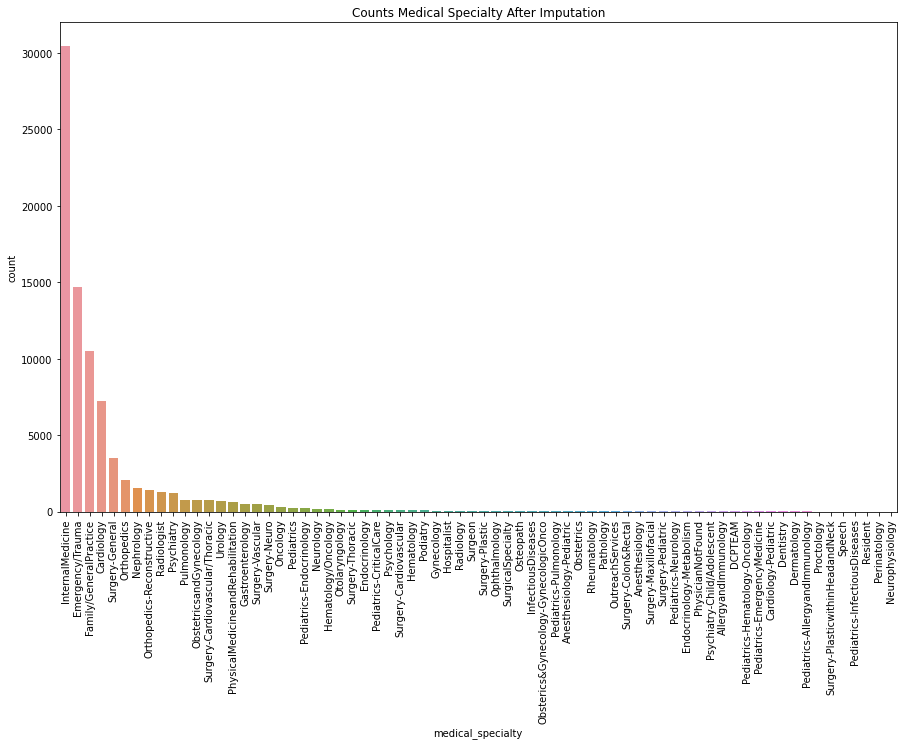

In [354]:
plt.figure(figsize=(15,9));
sns.countplot(data=X_train, x='medical_specialty', order=X_train['medical_specialty'].value_counts().index);
plt.xticks(rotation=90);
plt.title("Counts Medical Specialty After Imputation");

#### Impute Test data - Medical Specialty 

In [355]:
test_to_impute_concatenated_data = one_hot_encode_and_scaling(X_test_data_to_impute)

# Predicted Medical Speicalty from imputation
test_impute_prediction = imputation_model.predict(test_to_impute_concatenated_data[cols_interesction])
X_test.loc[y_test_data_to_impute.index,'medical_specialty'] = test_impute_prediction

In [376]:
X_train.isna().sum()

gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        14
diag_2                       287
diag_3                      1132
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

## Feature Selection
Below we used Random Forest Classifier variable importance to rank the scaled and centered train data. The top 40 features from this secondary feature selection were then selected for use in our models. This helps with eliminating sparse features or even features that only have one level, such as `examide` and `citoglipton`. Indirectly, This reduced set of features will then be used for the duration of this analysis. 

In [356]:
# Helper Function to perform One Hot Encoder and Standard Scaler
def one_hot_encode_and_scaling(data):
    cat_cols = []
    for col in data.columns:
        if data[col].dtype == object:
            cat_cols.append(col)
            
    encoder = OneHotEncoder(handle_unknown='ignore')
    codes = encoder.fit_transform(data[cat_cols])
    encoded_data = pd.DataFrame(codes.todense(), columns=encoder.get_feature_names(cat_cols), index=data.index).sort_index()

    scaler = StandardScaler()
    df_numeric = data.drop(cat_cols, axis=1)
    scaler_data = scaler.fit_transform(df_numeric)
    df_numeric = pd.DataFrame(data=scaler_data, columns=df_numeric.columns, index=df_numeric.index)
    
    concatenated_data = pd.concat([df_numeric, encoded_data], axis=1)
    
    return concatenated_data

Note: Here is our secondary random forest feature importance, which now considers our imputed 'medical specialty'

In [377]:
col_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'race', 'readmitted']

X_train_miss = train_miss.drop(col_to_drop, axis=1)
y_train_miss = train_miss['readmitted']
X_train_miss = X_train_miss.astype({
    "admission_type_id": object, 
    "discharge_disposition_id": object, 
    "admission_source_id": object,
}, errors='raise')

concatenated_data = one_hot_encode_and_scaling(X_train)

param_grid = [
    {'n_estimators': [100],
    'max_depth': [10]},
  ]

rf_clf = RandomForestClassifier(random_state=42)
grid_feature_importance = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', 
                           return_train_score=True, n_jobs=-1)
grid_feature_importance.fit(concatenated_data, y_train_miss)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10], 'n_estimators': [100]}],
             return_train_score=True, scoring='accuracy')

In [365]:
grid_feature_importance.cv_results_

{'mean_fit_time': array([199.08666387, 234.91312466, 235.67940536, 153.18012853]),
 'std_fit_time': array([ 0.3739491 ,  0.35959055,  0.7695871 , 60.77377271]),
 'mean_score_time': array([3.3316206 , 3.43055992, 2.90061407, 0.95720744]),
 'std_score_time': array([0.09292434, 0.10197936, 0.12685454, 0.15544349]),
 'param_max_depth': masked_array(data=[5, 5, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 100},
  {'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 10, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 200}],
 'split0_test_score': array([0.88896395, 0.88896395, 0.88896395, 0.88896395]),
 'split1_test_score': array([0.88896395, 0.88896395, 0.88896395, 0.88896395]),
 'split2_test_score': array([0.8

In [366]:
grid_feature_importance.best_estimator_

RandomForestClassifier(max_depth=5, random_state=42)

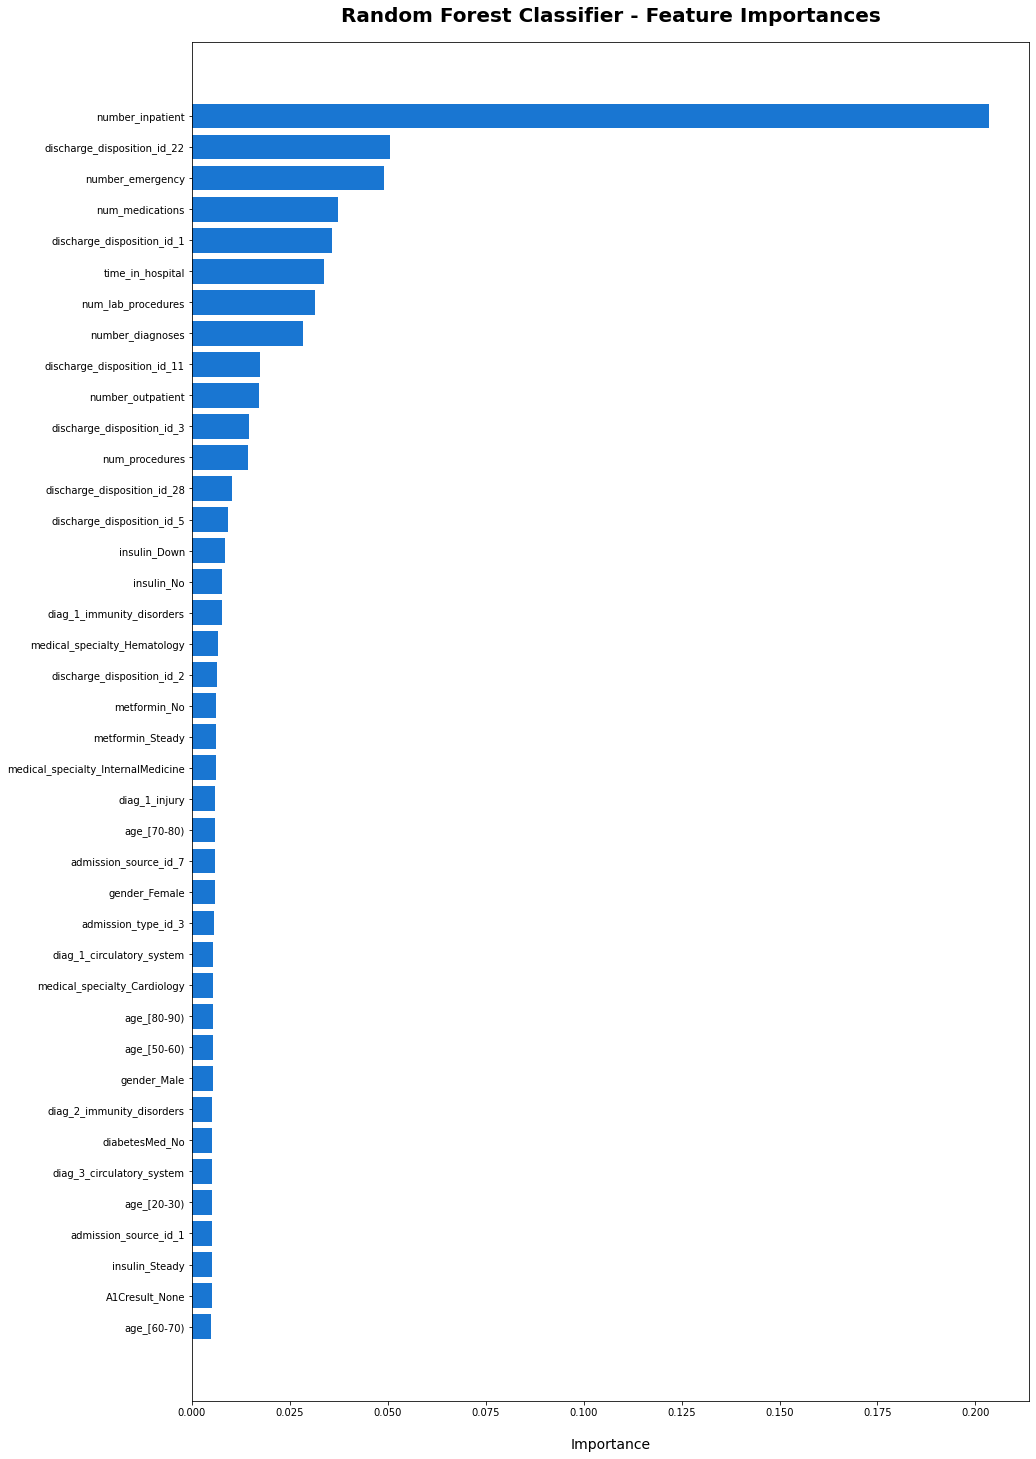

In [378]:
top_features_to_select = 40
dset = pd.DataFrame()
dset['attr'] = concatenated_data.columns
dset['importance'] = grid_feature_importance.best_estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)[len(dset)-top_features_to_select:]
col_by_importance = dset.attr.tolist()

plt.figure(figsize=(15, 25));
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2');
plt.title('Random Forest Classifier - Feature Importances', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Importance', fontsize=14, labelpad=20);

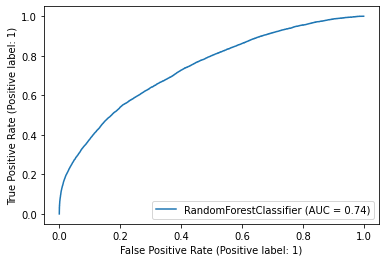

In [379]:
from sklearn import metrics

metrics.plot_roc_curve(grid_feature_importance.best_estimator_, concatenated_data, y_train_miss) ;

Here we use Second Random Forest to perform feature selection on onehot encoded and scaled data. 


In [384]:
X_train = one_hot_encode_and_scaling(X_train)
X_test = one_hot_encode_and_scaling(X_test)
cols_interesction_train = list(set(col_by_importance).intersection(set(X_train.columns)))
cols_intersection_test = list(set(col_by_importance).intersection(set(X_test.columns)))
cols_intersection = list(set(cols_interesction_train).intersection(set(cols_intersection_test)))
X_train = X_train[cols_intersection]
X_test = X_test[cols_intersection]

## Model - Logistic Regression 

Here we build a model which takes our cleansed and imputed training data and with 5-fold cross-validation predicts Readmitted (1) or Not Readmitted (0).  Logistic regression is a classification algorithm, used when the value of the target variable is categorical. It is most commonly used when the data in question has binary output.

ROC curves in logistic regression are used for determining the best cutoff value for predicting whether a new observation is a "failure" (0) or a "success" (1). Your observed outcome in logistic regression can ONLY be 0 or 1. The predicted probabilities from the model can take on all possible values between 0 and 1.Each dot on the curve represents a different possible cutoff value for classifying predicted values. You could feasibly pick any value between 0 and 1 as the cutoff, but doing this manually for every possible meaningful cutoff value would be exhausting. So what an ROC curve does is looks at every possible cutoff value that results in a change of classification of any observation in your data set.

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


param_grid = [
    {'penalty': ['none', 'l2'], 'C': [0.001, 0.01, 0.1], 'class_weight': [ None], 'max_iter': [200], 'n_jobs': [-1]},
  ]

log_reg = LogisticRegression(random_state=42)
grid_log_leg = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', 
                           return_train_score=True, n_jobs=-1)
grid_log_leg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1], 'class_weight': [None],
                          'max_iter': [200], 'n_jobs': [-1],
                          'penalty': ['none', 'l2']}],
             return_train_score=True, scoring='roc_auc')

In [245]:
best_log_reg = grid_log_leg.best_estimator_

In [246]:
grid_log_leg.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', max_iter=200, n_jobs=-1,
                   penalty='none', random_state=42)

In [137]:
grid_log_leg.cv_results_

{'mean_fit_time': array([10.74545221,  4.39178319, 11.16139293,  5.17086439, 11.17954316,
         7.20668387, 11.78734021,  7.65971837, 11.29172645,  8.94532728,
        11.74920244,  9.35967126, 11.4344028 ,  9.38375993, 12.27775993,
         9.15829272, 11.8238296 ,  9.97692003, 10.97786884,  7.37108059]),
 'std_fit_time': array([1.08561107, 1.43629174, 0.87815106, 0.32103916, 0.33816497,
        0.37728119, 1.27105107, 0.69290492, 0.34667919, 0.55595105,
        1.18753643, 0.82159875, 0.46489973, 0.49795827, 1.18732416,
        0.67865134, 0.32201013, 0.29635674, 0.76176926, 1.76019198]),
 'mean_score_time': array([0.02749939, 0.02576456, 0.02737184, 0.02289896, 0.02361264,
        0.02358317, 0.02433681, 0.02480202, 0.02109518, 0.02379556,
        0.02180548, 0.02071118, 0.02545552, 0.02608719, 0.02347198,
        0.02432127, 0.02748179, 0.02599335, 0.03138328, 0.02408786]),
 'std_score_time': array([0.00262874, 0.00549201, 0.00309151, 0.00098785, 0.00265243,
        0.00270207, 

In [160]:
X_train.columns

Index(['diag_1_circulatory_system', 'discharge_disposition_id_22',
       'number_outpatient', 'number_inpatient', 'number_emergency',
       'time_in_hospital', 'diag_1_immunity_disorders', 'age_[60-70)',
       'insulin_Steady', 'diag_2_circulatory_system', 'num_procedures',
       'gender_Male', 'admission_type_id_1', 'diag_2_immunity_disorders',
       'discharge_disposition_id_1', 'discharge_disposition_id_3',
       'age_[50-60)', 'insulin_No', 'num_medications', 'age_[80-90)',
       'admission_source_id_1', 'admission_source_id_7',
       'discharge_disposition_id_11', 'gender_Female', 'num_lab_procedures',
       'age_[70-80)', 'diag_3_immunity_disorders', 'diag_3_circulatory_system',
       'number_diagnoses', 'admission_type_id_2'],
      dtype='object')

In [407]:
y_pred_proba = grid_log_leg.best_estimator_.predict_proba(X_test)

In [408]:
y_pred_proba

array([[0.7721426 , 0.2278574 ],
       [0.84667125, 0.15332875],
       [0.92094341, 0.07905659],
       ...,
       [0.92355141, 0.07644859],
       [0.86268281, 0.13731719],
       [0.91109118, 0.08890882]])

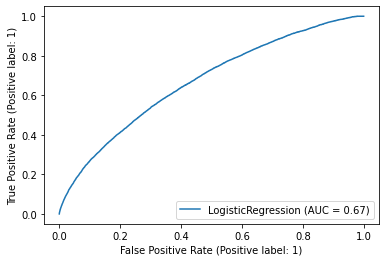

In [409]:
from sklearn import metrics

metrics.plot_roc_curve(grid_log_leg.best_estimator_, X_train, y_train) 

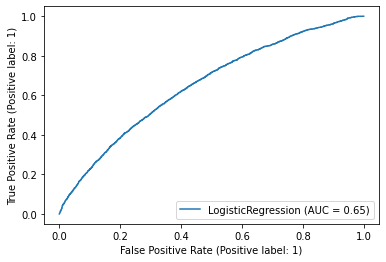

In [447]:
from sklearn import metrics

metrics.plot_roc_curve(grid_log_leg.best_estimator_, X_test, y_test) 

In [411]:
log_reg_result_df = pd.DataFrame(columns=['y_test', 'y_pred', 'y_proba_0', 'y_proba_1'])

In [412]:
log_reg_result_df['y_test'] = y_test
log_reg_result_df['y_pred'] = y_pred
log_reg_result_df['y_proba_0'] = y_pred_proba[:,0]
log_reg_result_df['y_proba_1'] = y_pred_proba[:,1]

In [413]:
log_reg_result_df.to_csv('./log_reg_result.csv')

In [414]:
log_reg_result_df

,y_test,y_pred,y_proba_0,y_proba_1
62102,0,0,0.772143,0.227857
10470,0,0,0.846671,0.153329
30169,0,0,0.920943,0.079057
44166,0,0,0.939947,0.060053
42304,1,0,0.838501,0.161499
...,...,...,...,...
50964,0,0,0.937531,0.062469
15165,0,0,0.897395,0.102605
50687,0,0,0.923551,0.076449
80799,0,0,0.862683,0.137317


### Precision - Recall

As can be seen below, we have made the Precision Recall graph in order to look the impact of different threshold. We can see that at around 0.15 of threshold we get the optimal Precision and Recall

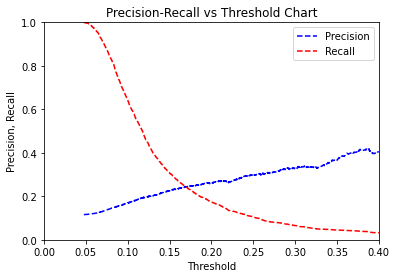

In [446]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
plt.title("Precision-Recall vs Threshold Chart");
plt.plot(thresholds, precision[: -1], "b--", label="Precision");
plt.plot(thresholds, recall[: -1], "r--", label="Recall");
plt.ylabel("Precision, Recall");
plt.xlabel("Threshold");
plt.legend(loc="upper right");
plt.ylim([0,1]);
plt.xlim([0,.4]);

In [444]:
log_reg_result_df.loc[log_reg_result_df[log_reg_result_df['y_proba_1'] > 0.15]['y_proba_1'].index, 'y_pred'] = 1
log_reg_result_df.loc[log_reg_result_df[log_reg_result_df['y_proba_1'] <= 0.15]['y_proba_1'].index, 'y_pred'] = 0
log_reg_result_df[log_reg_result_df['y_pred'] == 1]['y_pred'].count()
log_reg_result_df[log_reg_result_df['y_test'] == 1]['y_test'].count()
log_reg_result_df[(log_reg_result_df['y_pred'] == 1) & (log_reg_result_df['y_test'] == log_reg_result_df['y_pred'])]

true_positive_count = log_reg_result_df[(log_reg_result_df['y_pred'] == 1) & (log_reg_result_df['y_test'] == log_reg_result_df['y_pred'])]['y_pred'].count()

precision = true_positive_count / log_reg_result_df[log_reg_result_df['y_pred'] == 1]['y_pred'].count()
recall = true_positive_count / log_reg_result_df[log_reg_result_df['y_test'] == 1]['y_test'].count()
print(f"precision was: {precision}")
print(f"recall was: {recall}")

3170

2317

,y_test,y_pred,y_proba_0,y_proba_1
42304,1,1,0.838501,0.161499
31458,1,1,0.820025,0.179975
37847,1,1,0.722179,0.277821
98021,1,1,0.496590,0.503410
73603,1,1,0.821902,0.178098
...,...,...,...,...
16169,1,1,0.351474,0.648526
43634,1,1,0.712394,0.287606
81983,1,1,0.741556,0.258444
24066,1,1,0.780452,0.219548


precision was: 0.2246056782334385
recall was: 0.3072939145446698


## Model Interpretability

Below we can see the Log Regression feature importance has highest coefficients/importance on `discharge_disposition` as several levels of this features encoded data was shown on top. Unfortunately, we do not have the id mapping of the `discharge_disposition` that we are not able to explain what id_11 or id_28 means and how this is related with the readmittance. In future analysis, if we are able to get the id mapping of this feature, we may able to understand and explain the audiences what this represent in more details.

In [456]:
sorted(zip(abs(grid_log_leg.best_estimator_.coef_[0]), X_train.columns.values.tolist()), reverse=True)

[(7.462385330681686, 'discharge_disposition_id_11'),
 (1.5561062067175742, 'discharge_disposition_id_28'),
 (1.4429073376186103, 'medical_specialty_Hematology'),
 (1.029634000939602, 'discharge_disposition_id_22'),
 (0.746041849753932, 'discharge_disposition_id_5'),
 (0.46548621015764774, 'gender_Female'),
 (0.41780609584344863, 'gender_Male'),
 (0.38811180586104443, 'discharge_disposition_id_2'),
 (0.34316646449230287, 'number_inpatient'),
 (0.20657013100999136, 'discharge_disposition_id_1'),
 (0.18664103282519423, 'diag_1_immunity_disorders'),
 (0.18295605578773208, 'diag_1_circulatory_system'),
 (0.1794123099314652, 'discharge_disposition_id_3'),
 (0.1755912997310111, 'diabetesMed_No'),
 (0.15023712271301262, 'medical_specialty_Cardiology'),
 (0.1478046929037319, 'metformin_No'),
 (0.142051633886057, 'A1Cresult_None'),
 (0.10913683148721205, 'admission_source_id_1'),
 (0.1030083913158644, 'medical_specialty_InternalMedicine'),
 (0.10076345495630802, 'insulin_Down'),
 (0.096356339433

## Conclusion


Predicting the probability of a patient’s readmission is an essential aspect of hospitalization management. Using this logistic regression model, hospitals can gain insight into what factors play a vital role in third-day readmission. This model also gives hospitals the ability to better predict if a patient is likely to be readmitted. With these tools, hospitals can better allocate resources, save money, and ensure patients’ health is handled with care. 

With the expansion of data science and predictive modeling becoming more popular in healthcare, it is important to handle these tasks with care. A patient’s health and life can be dependent on these models, and as such proper time and oversight should be given to building and maintaining models.
